<h1>分開演示版

In [21]:
#連線
import requests

#找想要的beauty文，有些文章的圖片無法正確下載，目前還不知道原因
url = input("輸入表特版的文章的url：")
User_agent = input("輸入自己的User-Agent：")
headers = {
    "cookie":"over18=1",
    #寫入自己的User-Agent
    "User-Agent":User_agent
}

response = requests.get(url=url,headers=headers)
print(response.text)

輸入表特版的文章的url：https://www.ptt.cc/bbs/Beauty/M.1625536954.A.C59.html
輸入自己的User-Agent：Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36
<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>[正妹] 美女圖鑑1 - 本田翼 - 看板 Beauty - 批踢踢實業坊</title>
<meta name="robots" content="all">
<meta name="keywords" content="Ptt BBS 批踢踢">
<meta name="description" content="我不知這樣會不會有人討厭或觸犯版規，但我想要在這裡發表看看
既然是第一篇
那就從我最愛的女演員開始吧
初めてなので
私の一番好きな女優から始めましょう
">
<meta property="og:site_name" content="Ptt 批踢踢實業坊">
<meta property="og:title" content="[正妹] 美女圖鑑1 - 本田翼">
<meta property="og:description" content="我不知這樣會不會有人討厭或觸犯版規，但我想要在這裡發表看看
既然是第一篇
那就從我最愛的女演員開始吧
初めてなので
私の一番好きな女優から始めましょう
">
<link rel="canonical" href="https://www.ptt.cc/bbs/Beauty/M.1625536954.A.C59.html">

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" typ

In [22]:
#轉成beautifulsoup4
import bs4

soup = bs4.BeautifulSoup(response.text,"html.parser")
print(soup)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>[正妹] 美女圖鑑1 - 本田翼 - 看板 Beauty - 批踢踢實業坊</title>
<meta content="all" name="robots"/>
<meta content="Ptt BBS 批踢踢" name="keywords"/>
<meta content="我不知這樣會不會有人討厭或觸犯版規，但我想要在這裡發表看看
既然是第一篇
那就從我最愛的女演員開始吧
初めてなので
私の一番好きな女優から始めましょう
" name="description"/>
<meta content="Ptt 批踢踢實業坊" property="og:site_name"/>
<meta content="[正妹] 美女圖鑑1 - 本田翼" property="og:title"/>
<meta content="我不知這樣會不會有人討厭或觸犯版規，但我想要在這裡發表看看
既然是第一篇
那就從我最愛的女演員開始吧
初めてなので
私の一番好きな女優から始めましょう
" property="og:description"/>
<link href="https://www.ptt.cc/bbs/Beauty/M.1625536954.A.C59.html" rel="canonical"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-common.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-custom.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/

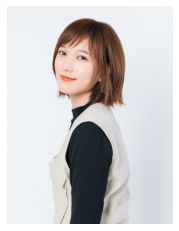

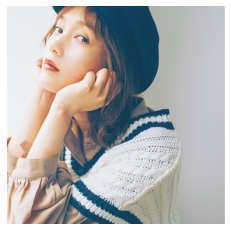

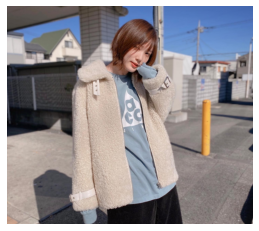

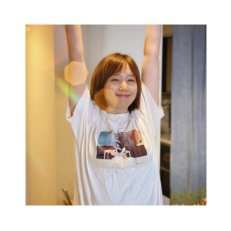

In [ ]:
#找出圖片並儲存
import shutil
import time
import cv2
import matplotlib.pyplot as plt

img_number = 1
#找出圖片的特色標籤
imgs = soup.find_all("a",target="_blank")
for img in imgs:
    #如果是圖片才動作
    if(img.string.find("imgur")!=-1):
        img_name = "ptt-beauty"+str(img_number)+".jpg"
        #stream=true 可強制解壓縮下載圖片
        img = requests.get(img.string,stream=True)
        #打開空的文件 並設定可寫入 wb用於圖片 若名稱不存在則會新增文件
        img_wb = open(img_name,'wb')
        #將圖片複製到文件內 img.raw可以找出圖片所在的記憶體位址
        shutil.copyfileobj(img.raw,img_wb)
        #寫完就關閉
        img_wb.close()
        #清除記憶體
        del img
        
        #讀圖片
        img_read = cv2.imread(img_name)
        plt.imshow(cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        img_number += 1
        time.sleep(1)

<h1>整合版

輸入表特版的文章的url：https://www.ptt.cc/bbs/Beauty/M.1625536954.A.C59.html
輸入自己的User-Agent：Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36


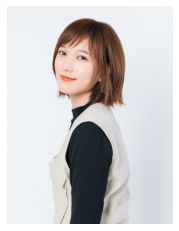

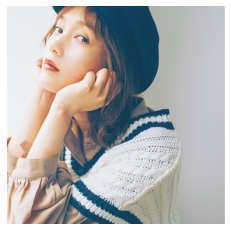

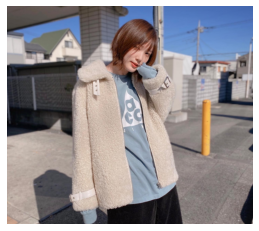

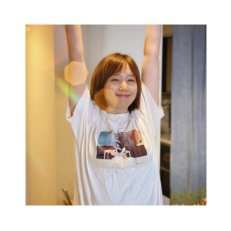

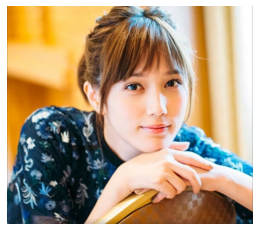

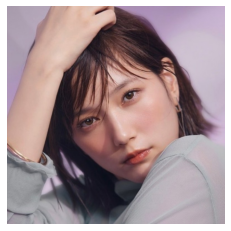

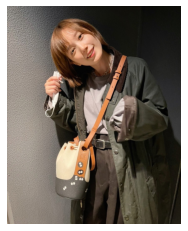

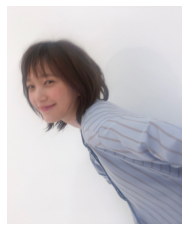

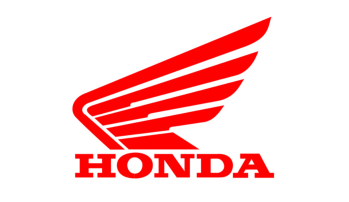

In [20]:
import requests
import bs4
import shutil
import time
import cv2
import matplotlib.pyplot as plt

#連線
#有些文章的圖片無法正確下載，目前還不知道原因
url = input("輸入表特版的文章的url：")
User_agent = input("輸入自己的User-Agent：")
headers = {
    "cookie":"over18=1",
    #寫入自己的User-Agent
    "User-Agent":User_agent
}

response = requests.get(url=url,headers=headers)

#轉成beautifulsoup4
soup = bs4.BeautifulSoup(response.text,"html.parser")

#找出圖片並儲存
img_number = 1
#找出圖片的特色標籤
imgs = soup.find_all("a",target="_blank")
for img in imgs:
    #如果是圖片才動作
    if(img.string.find("imgur")!=-1):
        img_name = "ptt-beauty"+str(img_number)+".jpg"
        #stream=true 可強制解壓縮下載圖片
        img = requests.get(img.string,stream=True)
        #打開空的文件 並設定可寫入 wb用於圖片 若名稱不存在則會新增文件
        img_wb = open(img_name,'wb')
        #將圖片複製到文件內 img.raw可以找出圖片所在的記憶體位址
        shutil.copyfileobj(img.raw,img_wb)
        #寫完就關閉
        img_wb.close()
        #清除記憶體
        del img
        
        #讀圖片
        img_read = cv2.imread(img_name)
        plt.imshow(cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        img_number += 1
        time.sleep(1)